### 参考课本P35

In [1]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(2019)   #  用于生成随机数

In [5]:
torch.cuda.is_available()    # 判断是否支持GPU
a = Variable(torch.Tensor(2))
b = Variable(torch.Tensor(2))
c = a * b
if torch.cuda.is_available():
    c_cuda = c.cuda()
    print(c_cuda)

print(torch.cuda.is_available())

tensor([0., 0.], device='cuda:0')
True


In [6]:
# 读入数据
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

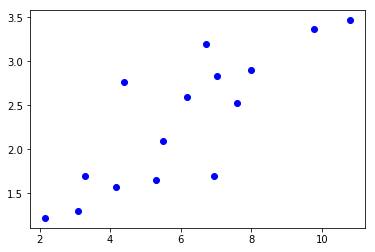

In [8]:
# 画出数据
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

In [9]:
# 转化成Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True)   # 随机初始化   randn 返回一个张量 这里为1   服从标准正态分布（均值为0，方差为1）
                                                    # rand（）为均匀分布  返回一个张量
b = Variable(torch.zeros(1), requires_grad=True)    # 使用0 进行初始化

In [10]:
# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [11]:
y_ = linear_model(x_train)

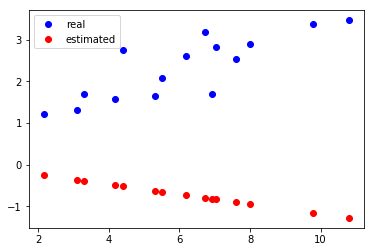

In [13]:
# 以上已经定义好模型，在进行参数更新之前，可以看看模型的输出结果
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')   # 注意这里x_train.data.numoy()  因为上面已经将x_train转为tensor了  故此处需要注意
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [14]:
# 计算误差
def get_loss(y_train, y_):
    return torch.mean((y_-y_train) ** 2)

loss = get_loss(y_train, y_)
# 打印loss大小
print("loss = ", loss)

loss =  tensor(10.2335, grad_fn=<MeanBackward0>)


In [15]:
loss.backward()    # 自动求导
print("w = ",w.grad,"\t b=",b.grad)

w =  tensor([-41.1289]) 	 b= tensor([-6.0890])


In [16]:
#更新以此参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

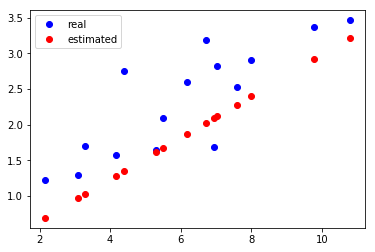

In [17]:
# 更新完参数后，再一次看看模型输出的结果
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

从上面的例子可以看到，更新之后红色的线跑到了蓝色的线下面，没有特别好的拟合蓝色的真实值，所以我们需要在进行几次更新

In [25]:
for e in range(10):    
    y_ = linear_model(x_train)
    loss = get_loss(y_train, y_)
    
    w.grad.zero_()     # 记得归零梯度
    b.grad.zero_()
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data   # 更新w
    b.data = b.data - 1e-2 * b.grad.data   # 更新b
    print(e)
    print("loss = ",loss.data.numpy())
#     print('epoch: {}, loss: {}'.format(e, loss.data[0]))

0
loss =  0.21941708
1
loss =  0.21915798
2
loss =  0.21890026
3
loss =  0.21864381
4
loss =  0.21838875
5
loss =  0.21813494
6
loss =  0.21788245
7
loss =  0.2176313
8
loss =  0.21738137
9
loss =  0.21713276


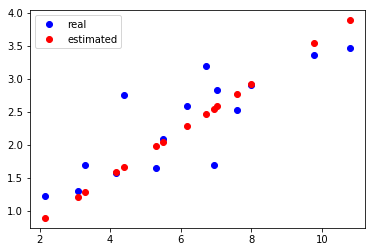

In [26]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

经过多次，我们发现红色的预测结果已经比较耗的拟合了蓝色的真实值

# 2 建立模型，根据上一节PyTorch的基础知识，定义一个简单的模型

In [31]:
# 导入相关包
from torch import nn
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
    

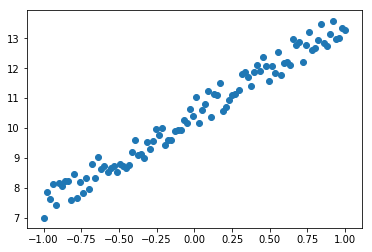

In [35]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)   # 返回一个新的张量，对输入的指定位置插入维度1，
                                                         # 返回张量与输入张量共享内存，若dim为负，则将被转化为dim+input.dim()+1
y = 3*x + 10 + torch.rand(x.size())   #  这行代码是制造出接近y=3x+10的数据集，后面加上torch.rand()函数制造噪音

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())   # 等价于 plt.plot(x.data.numpy(), y.data.numpy(), 'ro') 
plt.show()

In [39]:
# 定义线性回归
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)   # 输入和输出的维度都是1
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()
    
criterion = nn.MSELoss()   # 定义损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x).cuda()
        target = Variable(y).cuda()
    else:
        inputs = Variable(x)
        target = Variable(y)
        
    # 向前传播
    out = model(inputs)
    loss = criterion(out, target)
    
    # 向后传播
    optimizer.zero_grad()   # 注意每次迭代都需要清零
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1, num_epochs, loss.item()))


Epoch[20/1000], loss:56.796856
Epoch[40/1000], loss:25.979219
Epoch[60/1000], loss:12.097287
Epoch[80/1000], loss:5.798605
Epoch[100/1000], loss:2.906412
Epoch[120/1000], loss:1.552768
Epoch[140/1000], loss:0.900284
Epoch[160/1000], loss:0.572056
Epoch[180/1000], loss:0.397286
Epoch[200/1000], loss:0.297716
Epoch[220/1000], loss:0.236841
Epoch[240/1000], loss:0.197154
Epoch[260/1000], loss:0.169908
Epoch[280/1000], loss:0.150492
Epoch[300/1000], loss:0.136302
Epoch[320/1000], loss:0.125764
Epoch[340/1000], loss:0.117861
Epoch[360/1000], loss:0.111897
Epoch[380/1000], loss:0.107382
Epoch[400/1000], loss:0.103956
Epoch[420/1000], loss:0.101352
Epoch[440/1000], loss:0.099373
Epoch[460/1000], loss:0.097867
Epoch[480/1000], loss:0.096722
Epoch[500/1000], loss:0.095850
Epoch[520/1000], loss:0.095187
Epoch[540/1000], loss:0.094682
Epoch[560/1000], loss:0.094298
Epoch[580/1000], loss:0.094006
Epoch[600/1000], loss:0.093783
Epoch[620/1000], loss:0.093614
Epoch[640/1000], loss:0.093485
Epoch[660

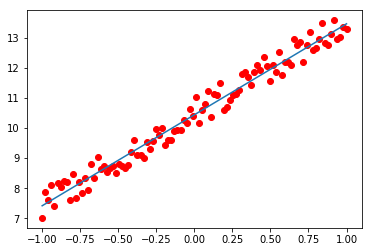

In [41]:
model.eval()
if torch.cuda.is_available():
    predict = model(Variable(x).cuda())
    predict = predict.data.cpu().numpy()
else:
    predict = model(Variable(x))
    predict = predict.data.numpy()

plt.plot(x.numpy(), y.numpy(), 'ro', label='Origin Data')
plt.plot(x.numpy(), predict, label='Fitting Line')
plt.show()